In [1]:
import pandas as pd 
import requests
import time

In [2]:
#url="https://data.cityofnewyork.us/resource/kpav-sd4t.json?$$app_token=VqqaMeCXwluae4iAUkvGyheal&$select=job_id,agency,number_of_positions,business_title,civil_service_title,job_category,career_level,salary_range_from,salary_range_to ,salary_frequency,work_location,job_description,minimum_qual_requirements,preferred_skills, posting_date,posting_updated,work_location,post_until&$limit=50000"
url = "https://data.cityofnewyork.us/resource/kpav-sd4t.json?$$app_token=VqqaMeCXwluae4iAUkvGyheal&$select=job_id,agency,number_of_positions,business_title,civil_service_title,job_category,career_level,salary_range_from,salary_range_to,salary_frequency,work_location,job_description,minimum_qual_requirements,work_location_1,posting_date,post_until&$limit=50000"

response=requests.get(url).json()

In [3]:
df = pd.DataFrame(response)


In [4]:
df.head()

,job_id,agency,number_of_positions,business_title,civil_service_title,job_category,career_level,salary_range_from,salary_range_to,salary_frequency,work_location,job_description,minimum_qual_requirements,posting_date,post_until,work_location_1
0,570873,DEPT OF CITYWIDE ADMIN SVCS,2,"Assistant Engineer, Load Management",ASSISTANT MECHANICAL ENGINEER,"Engineering, Architecture, & Planning",Experienced (non-manager),57078,65640,Annual,"1 Centre St., N.Y.",The Department of Citywide Administrative Serv...,1. A baccalaureate degree from an accredited c...,2023-05-12T00:00:00.000,11-JUL-2023,NaN
1,560933,DEPT OF ENVIRONMENT PROTECTION,1,City Research Scientist,CITY RESEARCH SCIENTIST,Constituent Services & Community Programs Poli...,Experienced (non-manager),75504,94761,Annual,59-17 Junction Blvd Corona Ny,The NYC Department of Environmental Protection...,"1. For Assignment Level I (only physical, bio...",2022-11-16T00:00:00.000,NaN,NaN
2,565857,POLICE DEPARTMENT,1,Police Administrative Aide,POLICE ADMINISTRATIVE AIDE,Administration & Human Resources,Experienced (non-manager),36390,55228,Annual,2770 Frederick Douglas Blvd,The mission of the New York City Police Depart...,1. A four-year high school diploma or its educ...,2022-12-21T00:00:00.000,NaN,"PSA 6: 2770 Frederick Douglas Blvd, NY, NY"
3,571786,DEPARTMENT OF CORRECTION,1,Business Intelligence Analyst,CITY RESEARCH SCIENTIST,"Policy, Research & Analysis",Experienced (non-manager),84468,111003,Annual,75-20 Astoria Blvd,The New York City Department of Correction (DO...,"1. For Assignment Level I (only physical, bio...",2023-01-27T00:00:00.000,NaN,NaN
4,566099,DEPT OF CITYWIDE ADMIN SVCS,1,Portfolio Manager,SPACE ANALYST,"Engineering, Architecture, & Planning",Experienced (non-manager),67757,77921,Annual,"1 Centre St., N.Y.",DCAS's mission is to make city government work...,1. A baccalaureate degree from an accredited c...,2023-03-29T00:00:00.000,28-MAY-2023,NaN


In [5]:
print(df.columns)
print(df.describe())

Index(['job_id', 'agency', 'number_of_positions', 'business_title',
       'civil_service_title', 'job_category', 'career_level',
       'salary_range_from', 'salary_range_to', 'salary_frequency',
       'work_location', 'job_description', 'minimum_qual_requirements',
       'posting_date', 'post_until', 'work_location_1'],
      dtype='object')
        job_id                          agency number_of_positions  \
count     5990                            5990                5990   
unique    3080                              55                  40   
top     553410  DEPT OF ENVIRONMENT PROTECTION                   1   
freq         3                            1034                4658   

             business_title    civil_service_title  \
count                  5990                   5990   
unique                 2225                    425   
top     ACCOUNTABLE MANAGER  COMMUNITY COORDINATOR   
freq                     81                    367   

                              

In [6]:
df.isnull().sum()

job_id                          0
agency                          0
number_of_positions             0
business_title                  0
civil_service_title             0
job_category                    0
career_level                    0
salary_range_from               0
salary_range_to                 0
salary_frequency                0
work_location                   0
job_description                 0
minimum_qual_requirements      41
posting_date                    0
post_until                   3898
work_location_1              3157
dtype: int64

In [7]:
df['minimum_qual_requirements']=df['minimum_qual_requirements'].fillna(' ')
df['work_location_1']=df['work_location_1'].fillna(' ')

In [8]:
df['salary']='$'+df['salary_range_from']+'-$'+df['salary_range_to']+'/'+df['salary_frequency']
df=df.rename({'job_id':'Job ID','business_title':'Title','salary':'Salary','post_until':'Post Until'}, axis=1)
df['Post Until']=df['Post Until'].fillna('Not Provided')

In [9]:
df.isnull().sum() 

Job ID                       0
agency                       0
number_of_positions          0
Title                        0
civil_service_title          0
job_category                 0
career_level                 0
salary_range_from            0
salary_range_to              0
salary_frequency             0
work_location                0
job_description              0
minimum_qual_requirements    0
posting_date                 0
Post Until                   0
work_location_1              0
Salary                       0
dtype: int64

In [10]:
df.duplicated().sum()

2882

In [11]:
df= df.drop_duplicates(subset='Job ID',keep='first')


In [12]:
df.duplicated().sum()

0

In [13]:
df['Job ID'].shape

(3080,)

In [14]:
df['number_of_positions'] = df['number_of_positions'].astype(float)
sum_position = (df['number_of_positions']).sum()
sum_position

7556.0

In [15]:
df['job_category'].unique().shape


(199,)

In [16]:
values=df['career_level'].value_counts().reset_index()

In [17]:
values

,index,career_level
0,Experienced (non-manager),2271
1,Manager,300
2,Entry-Level,266
3,Student,179
4,Executive,64


In [18]:
import plotly.graph_objects as go


The 'number_of_positions' column contains non-integer values.


In [21]:
import numpy as np
career = df.groupby('career_level')['number_of_positions'].sum().reset_index()

career


,career_level,number_of_positions
0,Entry-Level,2020.0
1,Executive,87.0
2,Experienced (non-manager),4738.0
3,Manager,336.0
4,Student,375.0


In [21]:
line_chart_date = df.copy()
line_chart_date['posting_date'] = pd.to_datetime(line_chart_date['posting_date'])
line_chart_date['month_year'] = line_chart_date['posting_date'].dt.strftime('%m/%Y')

In [22]:
line_chart_date['month_year']

0       05/2023
1       11/2022
2       12/2022
3       01/2023
4       03/2023
         ...   
5867    01/2023
5870    02/2023
5889    08/2022
5894    04/2023
5964    02/2023
Name: month_year, Length: 3080, dtype: object

In [25]:
# trying isin list 

list_t=['Executive','Student']
list_r=['DEPT OF ENVIRONMENT PROTECTION','DEPARTMENT OF TRANSPORTATION']
df_new=df[(df['career_level'].isin(list_t)) &(df['agency'].isin(list_r))]

In [35]:
df['agency'].unique().shape

(55,)

In [34]:
altr=df.groupby('agency')['number_of_positions'].sum().reset_index()
altr

,agency,number_of_positions
0,ADMIN FOR CHILDREN'S SVCS,374.0
1,ADMIN TRIALS AND HEARINGS,39.0
2,BOARD OF CORRECTION,1.0
3,BOROUGH PRESIDENT-BRONX,5.0
4,BRONX COMMUNITY BOARD #4,1.0
5,BRONX DISTRICT ATTORNEY,368.0
6,BUSINESS INTEGRITY COMMISSION,2.0
7,CAMPAIGN FINANCE BOARD,11.0
8,CIVILIAN COMPLAINT REVIEW BD,27.0
9,CONSUMER AND WORKER PROTECTION,14.0


In [27]:
temp_df=df[df['agency']=='DEPT OF ENVIRONMENT PROTECTION']
temp_df

,Job ID,agency,number_of_positions,Title,civil_service_title,job_category,career_level,salary_range_from,salary_range_to,salary_frequency,work_location,job_description,minimum_qual_requirements,posting_date,Post Until,work_location_1,Salary
1,560933,DEPT OF ENVIRONMENT PROTECTION,1.0,City Research Scientist,CITY RESEARCH SCIENTIST,Constituent Services & Community Programs Poli...,Experienced (non-manager),75504,94761,Annual,59-17 Junction Blvd Corona Ny,The NYC Department of Environmental Protection...,"1. For Assignment Level I (only physical, bio...",2022-11-16T00:00:00.000,Not Provided,,$75504-$94761/Annual
7,573298,DEPT OF ENVIRONMENT PROTECTION,1.0,2023-BIT-001-Desktop Support Analyst Intern,SUMMER COLLEGE INTERN,"Technology, Data & Innovation",Student,15,15,Hourly,59-17 Junction Blvd Corona Ny,The NYC Department of Environmental Protection...,As of June of the Program year the prospective...,2023-02-06T00:00:00.000,02-JUN-2023,"Main Office at 59-17 Junction Blvd, Corona NY.",$15-$15/Hourly
12,552140,DEPT OF ENVIRONMENT PROTECTION,2.0,Civil Engineering Intern,CIVIL ENGINEERING INTERN,"Engineering, Architecture, & Planning",Entry-Level,51413,62260,Annual,59-17 Junction Blvd Corona Ny,The New York City Department of Environmental ...,1. A baccalaureate degree in civil engineering...,2022-09-30T00:00:00.000,Not Provided,,$51413-$62260/Annual
20,574614,DEPT OF ENVIRONMENT PROTECTION,1.0,Mechanical Engineering Intern,MECHANICAL ENGINEERING INTERN,"Engineering, Architecture, & Planning",Entry-Level,59125,62260,Annual,59-17 Junction Blvd Corona Ny,The NYC Department of Environmental Protection...,1. A bachelor's degree in mechanical engineeri...,2023-02-15T00:00:00.000,Not Provided,,$59125-$62260/Annual
21,572056,DEPT OF ENVIRONMENT PROTECTION,1.0,Asset Management Program Planner,CITY RESEARCH SCIENTIST,"Engineering, Architecture, & Planning",Manager,84468,111003,Annual,96-05 Horace Harding Expway,The NYC Department of Environmental Protection...,"1. For Assignment Level I (only physical, bio...",2023-03-28T00:00:00.000,Not Provided,"96-05 Horace Harding Expressway, 2nd floor, Co...",$84468-$111003/Annual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5728,566448,DEPT OF ENVIRONMENT PROTECTION,1.0,"Director, Project Delivery",ADMINISTRATIVE CONSTRUCTION PR,"Engineering, Architecture, & Planning",Manager,80931,208826,Annual,96-05 Horace Harding Expway,***IMPORTANT NOTE: Only those currently servin...,At least six years of full-time satisfactory e...,2023-01-09T00:00:00.000,Not Provided,"96-05 Horace Harding Expressway, 2nd Floor Cor...",$80931-$208826/Annual
5796,577826,DEPT OF ENVIRONMENT PROTECTION,2.0,Industrial Hygienist,INDUSTRIAL HYGIENIST,"Health Public Safety, Inspections, & Enforcement",Experienced (non-manager),56041,75318,Annual,96-05 Horace Harding Expway,*** IMPORTANT NOTE: Only those currently servi...,1. A baccalaureate degree from an accredited c...,2023-03-24T00:00:00.000,Not Provided,"96-05 Horace Harding Expressway, 2nd floor Cor...",$56041-$75318/Annual
5820,550774,DEPT OF ENVIRONMENT PROTECTION,1.0,Special Assistant to the CFO,ADMINISTRATIVE STAFF ANALYST (,"Finance, Accounting, & Procurement Policy, Res...",Experienced (non-manager),94715,115000,Annual,59-17 Junction Blvd Corona Ny,PLEASE NOTE: APPLICANTS MUST BE PERMANENT IN T...,1. A master's degree from an accredited colleg...,2022-09-16T00:00:00.000,Not Provided,59-17 Junction Blvd Corona Ny,$94715-$115000/Annual
5844,551850,DEPT OF ENVIRONMENT PROTECTION,1.0,Energy Program Manager,CITY RESEARCH SCIENTIST,"Engineering, Architecture, & Planning Policy, ...",Experienced (non-manager),94283,108426,Annual,96-05 Horace Harding Expway,The NYC Department of Environmental Protection...,"1. For Assignment Level I (only physical, bio...",2022-10-20T00:00:00.000,Not Provided,96-05 Horace Harding Expway,$94283-$108426/Annual


In [22]:
import plotly.express as px


In [23]:
line_chart_date = df.copy()
line_chart_date['posting_date'] = pd.to_datetime(line_chart_date['posting_date'])
line_chart_date['month_year'] = line_chart_date['posting_date'].dt.strftime('%m/%Y')
jobs_per_month=line_chart_date.groupby('month_year')['number_of_positions'].sum().astype(float).reset_index()

jobs_per_month = jobs_per_month.rename(columns={'month_year': 'Month Year', 'number_of_positions': 'Job Count'})

# Convert 'Month Year' to a pandas datetime column to sort
jobs_per_month['Month Year'] = pd.to_datetime(jobs_per_month['Month Year'], format='%m/%Y')
jobs_per_month = jobs_per_month.sort_values('Month Year')

fig = px.line(jobs_per_month, x='Month Year', y='Job Count')
fig.show()

## Trying to improve visuals

In [ ]:
import numpy as np
new_df=df[df['career_level']=='Experienced (non-manager)']
agency = new_df.groupby(['agency' , 'job_category'])['number_of_positions'].sum().astype(float).reset_index()

a=agency.pivot(index='agency',columns='job_category',values='number_of_positions').fillna(0)


plt.figure(figsize=(100,100))


sns.heatmap(a, annot=True, cmap="tab20",linecolor='black',linewidth=2)

In [25]:
import plotly.graph_objects as go


In [26]:
import plotly.express as px


In [27]:
sum_column = sum(int(val) for val in df['number_of_positions'])



In [28]:
sum_column

7556

In [29]:
line_chart_date = df.copy()
line_chart_date['posting_date'] = pd.to_datetime(line_chart_date['posting_date'])
line_chart_date['month_year'] = line_chart_date['posting_date'].dt.strftime('%m/%Y')
jobs_per_month = line_chart_date['month_year'].value_counts().reset_index()
jobs_per_month = jobs_per_month.rename(columns={'index': 'Month Year', 'month_year': 'Job Count'})

# Convert 'Month Year' to a pandas datetime column and sort by it
jobs_per_month['Month Year'] = pd.to_datetime(jobs_per_month['Month Year'], format='%m/%Y')
jobs_per_month = jobs_per_month.sort_values('Month Year')

fig = px.line(jobs_per_month, x='Month Year', y='Job Count')
fig.show()

In [30]:
print(df['number_of_positions'].dtype)
print(df['number_of_positions'].isnull().sum())


float64
0


<Axes: ylabel='career_level'>

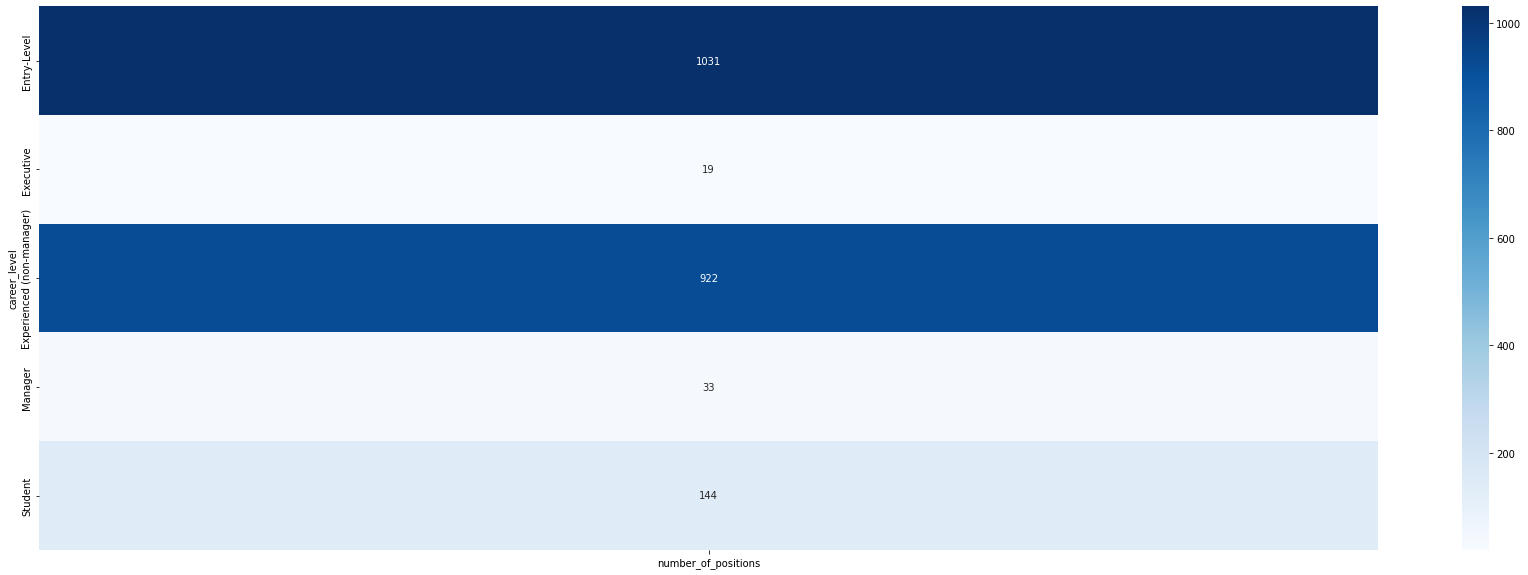

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df['number_of_positions'] = df['number_of_positions'].astype(np.int64)

x=df.drop_duplicates(['career_level','number_of_positions'])

plt.figure(figsize=(30,10))
table=x.pivot_table(index='career_level',values='number_of_positions',aggfunc=np.sum)
table = table.astype(np.int64)

sns.heatmap(table,annot=True,fmt='d',cmap="Blues")